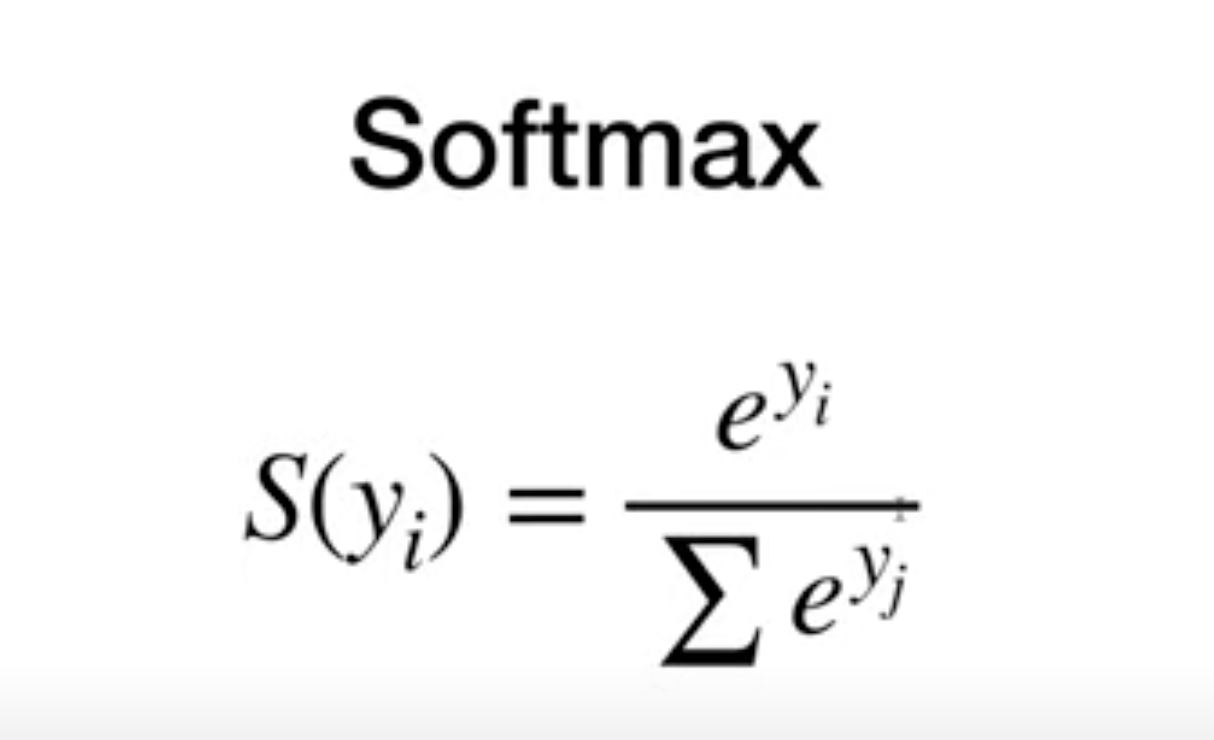

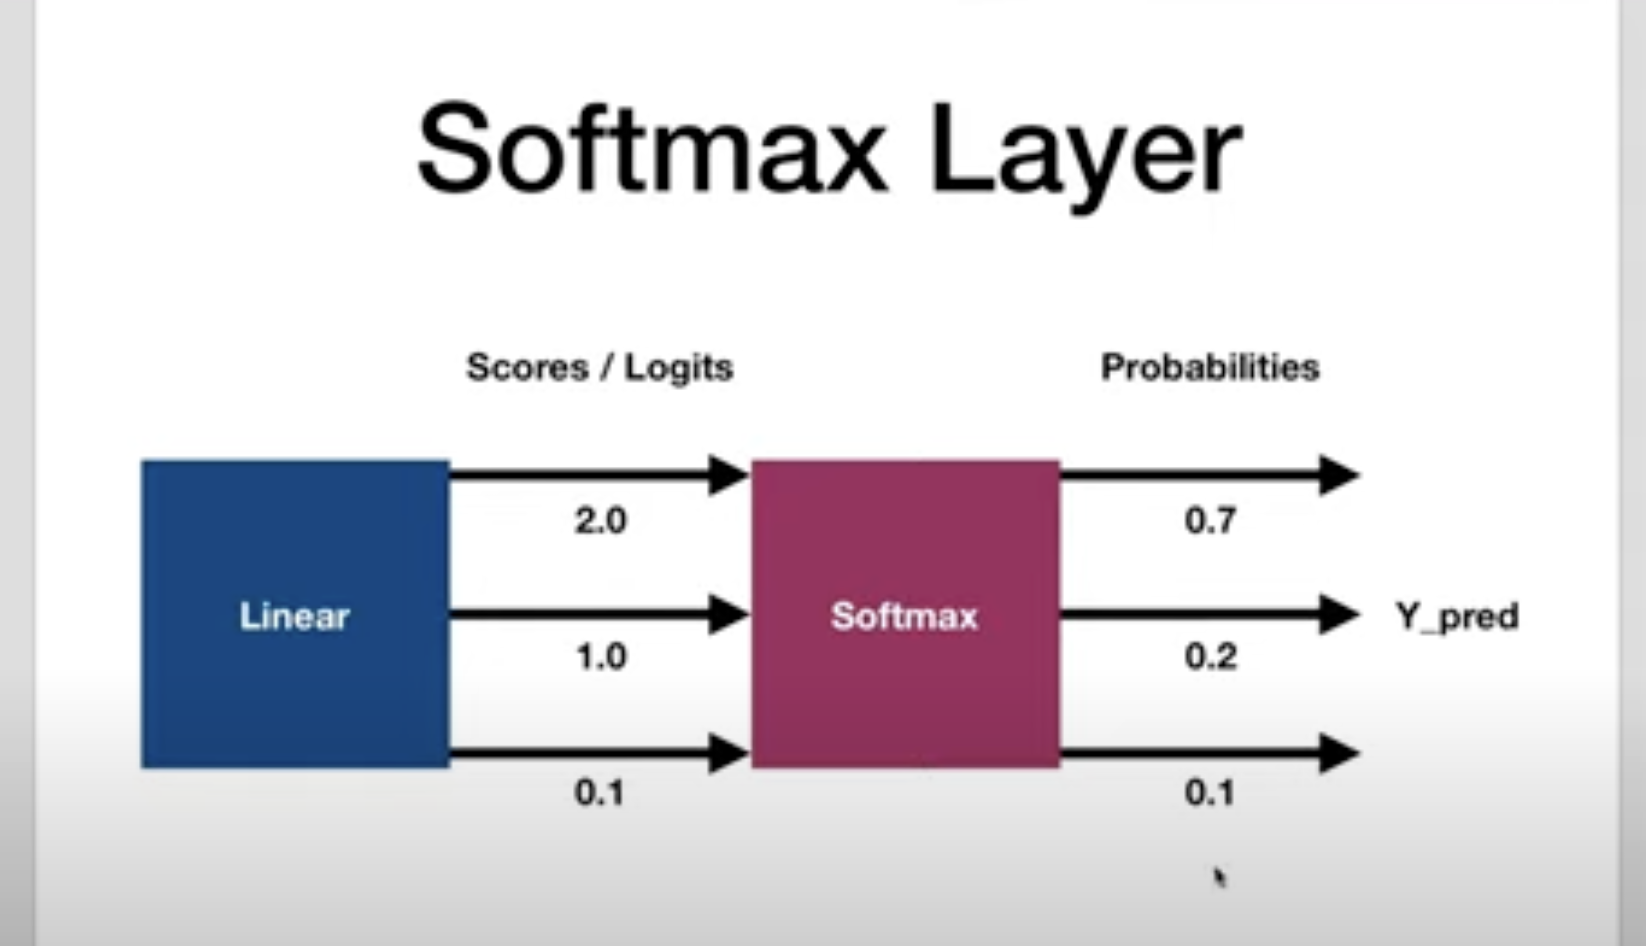

In [6]:
# building softmax using numpy
import torch
import torch.nn as nn 
import numpy as np 

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("Softmax numpy:", outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print("Softmax torch:", outputs)

Softmax numpy: [0.65900114 0.24243297 0.09856589]
Softmax torch: tensor([0.6590, 0.2424, 0.0986])


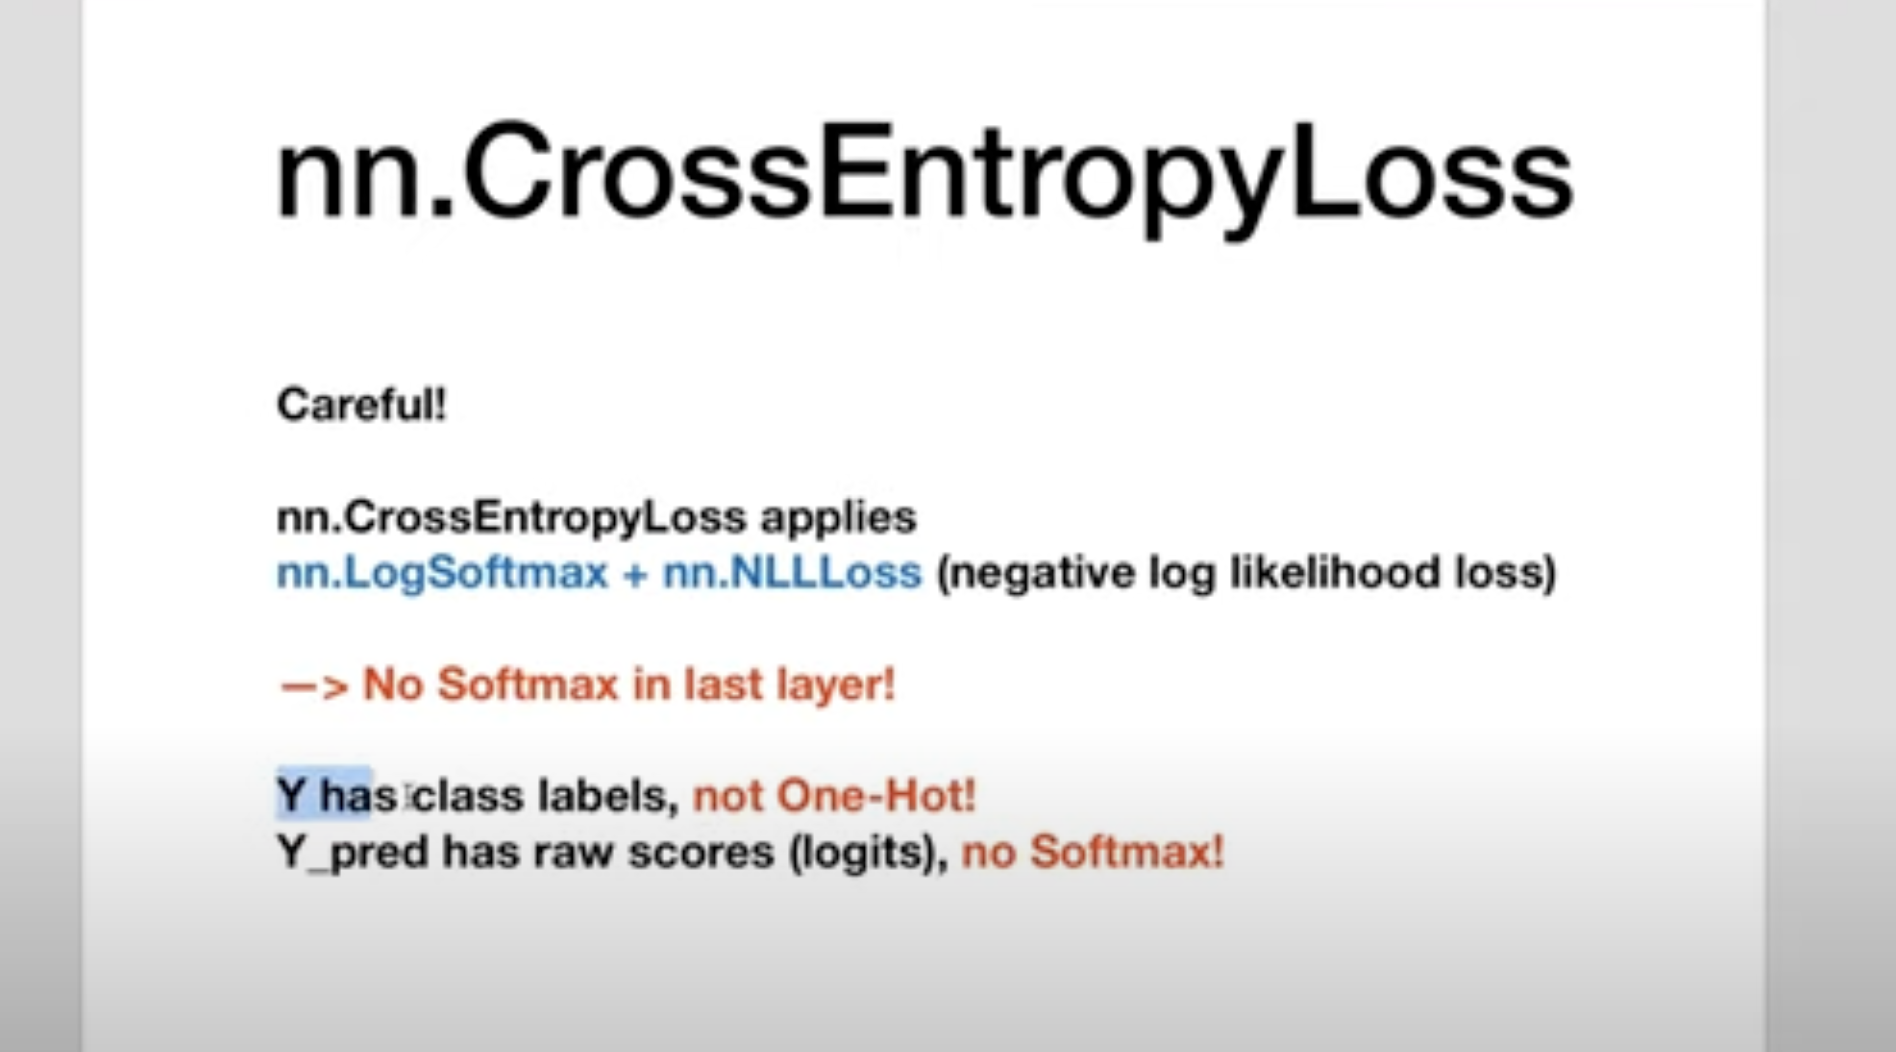

In [7]:
# buildong cross entropy using numpy
import torch
import torch.nn as nn 
import numpy as np 

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

# y must be onehot encoded
# if class 0: [1,0,0]
# if class 1: [0,1,0]
# if class 2: [0,0,1]
Y = np.array([1,0,0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [11]:
# buildong cross entropy using torch
import torch
import torch.nn as nn 
import numpy as np 

loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])
# n_samples x n_classes = 1 x 3
Y_pred_good = torch.tensor([[2.0, 0.2, 0.1]])
Y_pred_bad = torch.tensor([[0.1, 2.0, 0.6]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.273735910654068
2.233729600906372
tensor([0])
tensor([1])


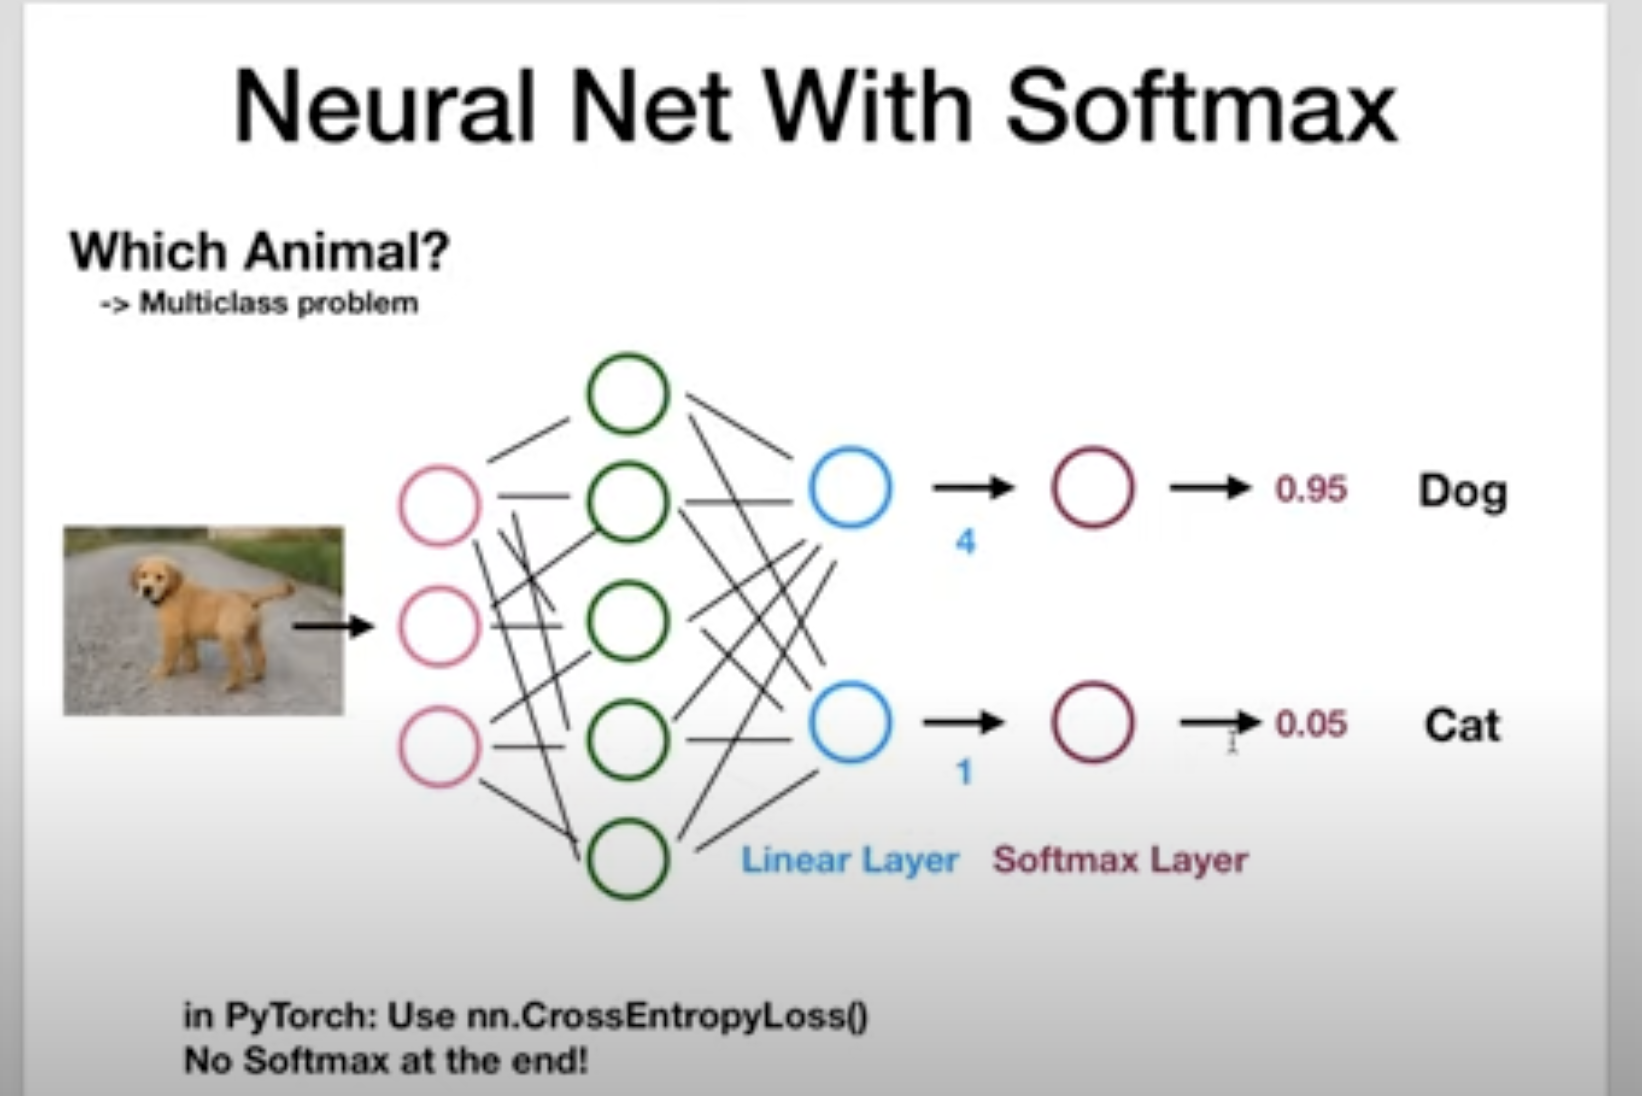

In [13]:
import torch
import torch.nn as nn 

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()

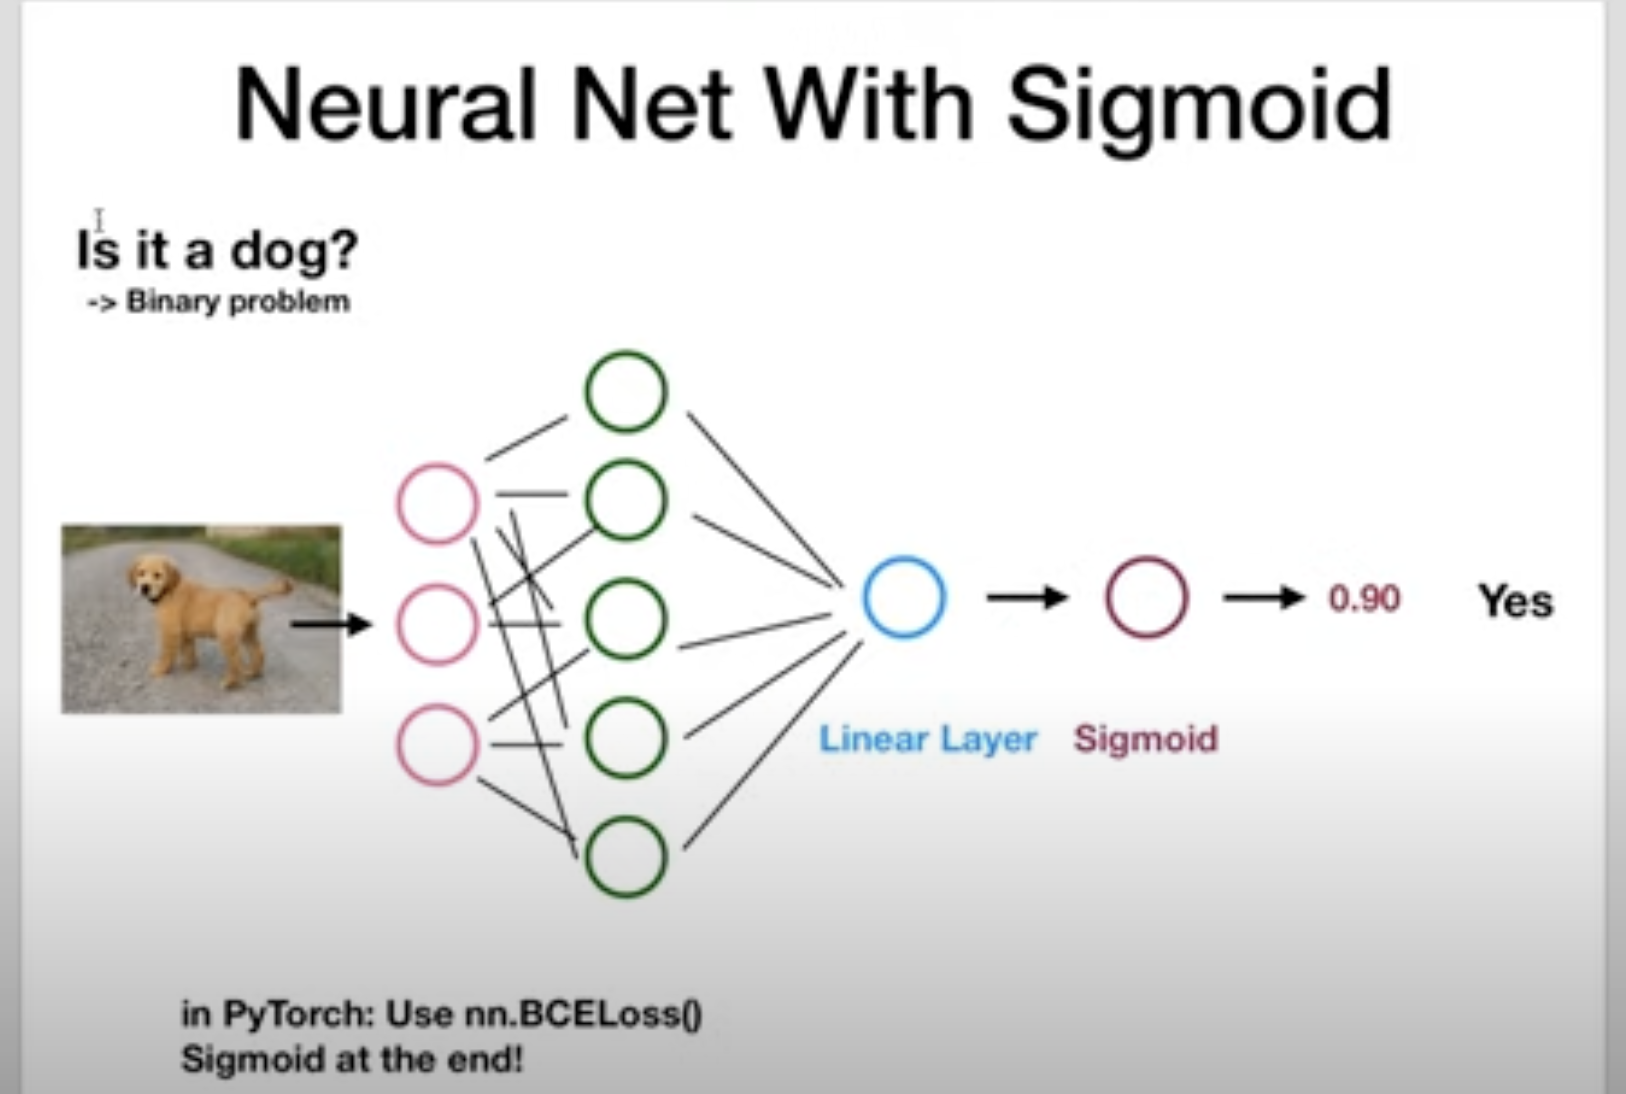

In [17]:
import torch
import torch.nn as nn 

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        y_pred = torch.sigmoid(out)
        return y_pred
    
model = NeuralNet2(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss